In [2]:
# Import dependencies
import pandas as pd
import numpy as np
#import hvplot.pandas
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from IPython.display import clear_output

In [3]:
# Loads the data into a DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/skronheim/project-4/main/Resources/filtered_encoded_dataset.csv")

df.head()

,primary_artist,track_name,popularity,explicit,danceability,energy,loudness,mode,speechiness,acousticness,...,num_artists_binned_4,num_artists_binned_5,num_artists_binned_6,track_genre_0,track_genre_1,track_genre_2,track_genre_3,track_genre_4,track_genre_5,track_genre_6
0,Gen Hoshino,Comedy,73,0,0.676,0.4610,-6.746,0,0.1430,0.0322,...,0,0,0,0,0,0,0,0,0,1
1,Ben Woodward,Ghost - Acoustic,55,0,0.420,0.1660,-17.235,1,0.0763,0.9240,...,0,0,0,0,0,0,0,0,0,1
2,Ingrid Michaelson,To Begin Again,57,0,0.438,0.3590,-9.734,1,0.0557,0.2100,...,0,0,0,0,0,0,0,0,0,1
3,Kina Grannis,Can't Help Falling In Love,71,0,0.266,0.0596,-18.515,1,0.0363,0.9050,...,0,0,0,0,0,0,0,0,0,1
4,Chord Overstreet,Hold On,82,0,0.618,0.4430,-9.681,1,0.0526,0.4690,...,0,0,0,0,0,0,0,0,0,1


In [7]:
df_clean = df.drop(["key_0", "key_1","key_2","key_3","key_4",
             "key_5", "key_6","key_7","key_8","key_9", "key_10","key_11","num_artists_binned_1","num_artists_binned_2",
              "num_artists_binned_3","num_artists_binned_4","num_artists_binned_5","num_artists_binned_6"], axis=1)
df_clean.head()

,primary_artist,track_name,popularity,explicit,danceability,energy,loudness,mode,speechiness,acousticness,...,time_signature_3,time_signature_4,time_signature_5,track_genre_0,track_genre_1,track_genre_2,track_genre_3,track_genre_4,track_genre_5,track_genre_6
0,Gen Hoshino,Comedy,73,0,0.676,0.4610,-6.746,0,0.1430,0.0322,...,0,1,0,0,0,0,0,0,0,1
1,Ben Woodward,Ghost - Acoustic,55,0,0.420,0.1660,-17.235,1,0.0763,0.9240,...,0,1,0,0,0,0,0,0,0,1
2,Ingrid Michaelson,To Begin Again,57,0,0.438,0.3590,-9.734,1,0.0557,0.2100,...,0,1,0,0,0,0,0,0,0,1
3,Kina Grannis,Can't Help Falling In Love,71,0,0.266,0.0596,-18.515,1,0.0363,0.9050,...,1,0,0,0,0,0,0,0,0,1
4,Chord Overstreet,Hold On,82,0,0.618,0.4430,-9.681,1,0.0526,0.4690,...,0,1,0,0,0,0,0,0,0,1


In [8]:
df.columns

Index(['primary_artist', 'track_name', 'popularity', 'explicit',
       'danceability', 'energy', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_min', 'time_signature_0', 'time_signature_1',
       'time_signature_3', 'time_signature_4', 'time_signature_5', 'key_0',
       'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8',
       'key_9', 'key_10', 'key_11', 'num_artists_binned_1',
       'num_artists_binned_2', 'num_artists_binned_3', 'num_artists_binned_4',
       'num_artists_binned_5', 'num_artists_binned_6', 'track_genre_0',
       'track_genre_1', 'track_genre_2', 'track_genre_3', 'track_genre_4',
       'track_genre_5', 'track_genre_6'],
      dtype='object')

In [9]:
features = ["popularity","danceability", "energy","loudness","tempo"]

In [10]:
df = df.dropna(subset=features)

In [11]:
df.set_index("primary_artist",inplace = True)
df.head()

,track_name,popularity,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,...,num_artists_binned_4,num_artists_binned_5,num_artists_binned_6,track_genre_0,track_genre_1,track_genre_2,track_genre_3,track_genre_4,track_genre_5,track_genre_6
primary_artist,,,,,,,,,,,,,,,,,,,,,
Gen Hoshino,Comedy,73,0,0.676,0.4610,-6.746,0,0.1430,0.0322,0.000001,...,0,0,0,0,0,0,0,0,0,1
Ben Woodward,Ghost - Acoustic,55,0,0.420,0.1660,-17.235,1,0.0763,0.9240,0.000006,...,0,0,0,0,0,0,0,0,0,1
Ingrid Michaelson,To Begin Again,57,0,0.438,0.3590,-9.734,1,0.0557,0.2100,0.000000,...,0,0,0,0,0,0,0,0,0,1
Kina Grannis,Can't Help Falling In Love,71,0,0.266,0.0596,-18.515,1,0.0363,0.9050,0.000071,...,0,0,0,0,0,0,0,0,0,1
Chord Overstreet,Hold On,82,0,0.618,0.4430,-9.681,1,0.0526,0.4690,0.000000,...,0,0,0,0,0,0,0,0,0,1


In [12]:
data = df[features].copy()
data.head()

,popularity,danceability,energy,loudness,tempo
primary_artist,,,,,
Gen Hoshino,73,0.676,0.4610,-6.746,87.917
Ben Woodward,55,0.420,0.1660,-17.235,77.489
Ingrid Michaelson,57,0.438,0.3590,-9.734,76.332
Kina Grannis,71,0.266,0.0596,-18.515,181.740
Chord Overstreet,82,0.618,0.4430,-9.681,119.949


In [13]:
data_scaled = StandardScaler().fit_transform(
    data)

In [14]:
 # Create a DataFrame with the scaled data
df_data_scaled = pd.DataFrame(
    data_scaled,
    columns= data.columns
)

# Copy the tickers names from the original data
df_data_scaled["primary_artist"] = data.index

# Set the Ticker column as index
df_data_scaled = df_data_scaled.set_index("primary_artist")

# Display sample data
df_data_scaled.head()

,popularity,danceability,energy,loudness,tempo
primary_artist,,,,,
Gen Hoshino,1.780470,0.628394,-0.721328,0.298800,-1.142994
Ben Woodward,0.972707,-0.847891,-1.896382,-1.794228,-1.490909
Ingrid Michaelson,1.062459,-0.744089,-1.127618,-0.297440,-1.529510
Kina Grannis,1.690719,-1.735968,-2.320198,-2.049645,1.987275
Chord Overstreet,2.184352,0.293923,-0.793026,-0.286864,-0.074292


In [15]:
df_data_scaled.dtypes

popularity      float64
danceability    float64
energy          float64
loudness        float64
tempo           float64
dtype: object

In [17]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))

for i in k:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(df_data_scaled)
    inertia.append(k_model.inertia_)
    
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}

# Create the DataFrame from the elbow data
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()


               

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

,k,inertia
0,1,567745.000000
1,2,425359.648101
2,3,355789.825863
3,4,302518.043227
4,5,272912.643988


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

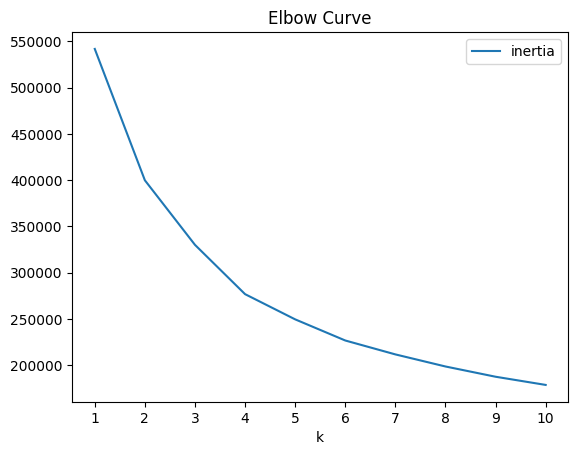

In [35]:
# Plot the DataFrame
df_elbow.plot(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

In [19]:
 # Initialize the K-Means model with n_clusters=3
model = KMeans(n_clusters=4)

# Fit the model for the df_stocks_pca DataFrame
model.fit(df_data_scaled)

# Predict the model segments (clusters)
artist_clusters = model.predict(df_data_scaled)

# Print the stock segments
print(artist_clusters)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 2 0 ... 2 0 1]


In [20]:
 # Create a copy of the df_stocks_pca DataFrame and name it as df_stocks_pca_predictions
df_data_scaled_predictions = df_data_scaled.copy()

# Create a new column in the DataFrame with the predicted clusters
df_data_scaled_predictions["ArtistCluster"] = artist_clusters

# Review the DataFrame
df_data_scaled_predictions.head()

,popularity,danceability,energy,loudness,tempo,ArtistCluster
primary_artist,,,,,,
Gen Hoshino,1.780470,0.628394,-0.721328,0.298800,-1.142994,0
Ben Woodward,0.972707,-0.847891,-1.896382,-1.794228,-1.490909,2
Ingrid Michaelson,1.062459,-0.744089,-1.127618,-0.297440,-1.529510,0
Kina Grannis,1.690719,-1.735968,-2.320198,-2.049645,1.987275,2
Chord Overstreet,2.184352,0.293923,-0.793026,-0.286864,-0.074292,0


<Axes: title={'center': 'Scatter Plot by artist cluster '}, xlabel='popularity', ylabel='danceability'>

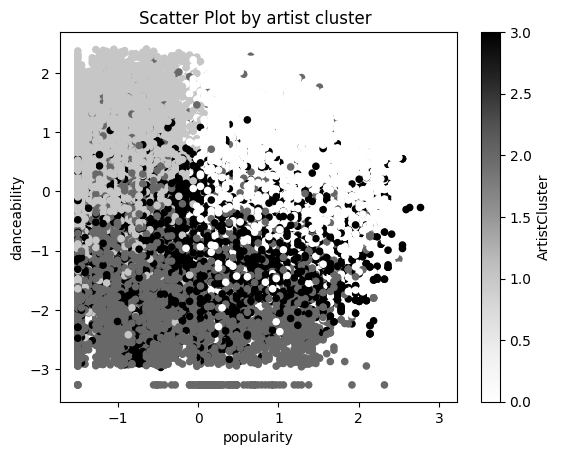

In [22]:
df_data_scaled_predictions.plot.scatter(
    x="popularity",
    y="danceability",
    c="ArtistCluster",
    title = "Scatter Plot by artist cluster "
)

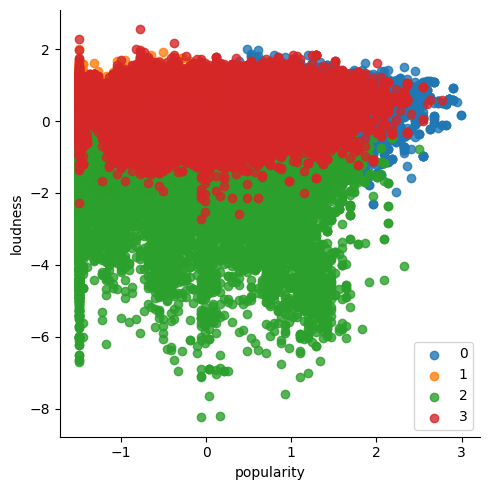

In [25]:
# library & dataset
import seaborn as sns
import matplotlib.pyplot as plt

 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="popularity", y="loudness", data=df_data_scaled_predictions, fit_reg=False, hue='ArtistCluster', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

plt.show()

In [31]:
 # Create the PCA model instance where n_components=2
pca = PCA(n_components=4)
# Fit the df_stocks_scaled data to the PCA
PCA_data = pca.fit_transform(df_data_scaled)

# Review the first five rose of the PCA data
# using bracket notation ([0:5])
PCA_data[:5]

array([[ 0.37506764, -1.78740144,  1.30170303,  0.39374761],
       [ 3.01677552, -0.64544362,  0.90906672,  0.59675783],
       [ 1.52270405, -0.80538384,  0.85522726,  1.15995989],
       [ 2.59784181,  1.87098195,  2.66389336, -1.40331198],
       [ 0.54886211, -0.98799243,  2.04426415, -0.26727685]])

In [32]:
 # Calculate the explained variance
sum(pca.explained_variance_ratio_)

0.9545812331704759

In [33]:
 # Creating a DataFrame with the PCA data
df_pca = pd.DataFrame(PCA_data, columns=["PC1", "PC2", "PC3", "PC4"])

# Copy the tickers names from the original data
df_pca["ArtistCluster"] = df_data_scaled.index

# Set the Ticker column as index
df_pca = df_pca.set_index("ArtistCluster")

# Review the DataFrame
df_pca.head()

,PC1,PC2,PC3,PC4
ArtistCluster,,,,
Gen Hoshino,0.375068,-1.787401,1.301703,0.393748
Ben Woodward,3.016776,-0.645444,0.909067,0.596758
Ingrid Michaelson,1.522704,-0.805384,0.855227,1.159960
Kina Grannis,2.597842,1.870982,2.663893,-1.403312
Chord Overstreet,0.548862,-0.987992,2.044264,-0.267277


In [34]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))

for i in k:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(df_pca)
    inertia.append(k_model.inertia_)
    
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}

# Create the DataFrame from the elbow data
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

,k,inertia
0,1,541958.722226
1,2,399905.369006
2,3,330090.682975
3,4,276770.864359
4,5,249506.663840


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

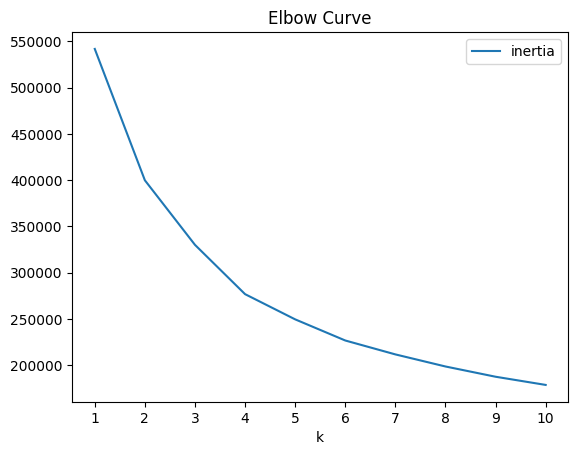

In [36]:
# Plot the DataFrame
df_elbow.plot(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

In [37]:
 # Initialize the K-Means model with n_clusters=3
model2 = KMeans(n_clusters=4)

# Fit the model for the df_stocks_pca DataFrame
model2.fit(df_pca)

# Predict the model segments (clusters)
artist_clusters2 = model2.predict(df_pca)

# Print the stock segments
print(artist_clusters2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[3 2 3 ... 2 3 0]


In [38]:
 # Create a copy of the df_stocks_pca DataFrame and name it as df_stocks_pca_predictions
df_pca_predictions = df_pca.copy()

# Create a new column in the DataFrame with the predicted clusters
df_pca_predictions["ArtistCluster"] = artist_clusters2

# Review the DataFrame
df_pca_predictions.head()

,PC1,PC2,PC3,PC4,ArtistCluster
ArtistCluster,,,,,
Gen Hoshino,0.375068,-1.787401,1.301703,0.393748,3
Ben Woodward,3.016776,-0.645444,0.909067,0.596758,2
Ingrid Michaelson,1.522704,-0.805384,0.855227,1.159960,3
Kina Grannis,2.597842,1.870982,2.663893,-1.403312,2
Chord Overstreet,0.548862,-0.987992,2.044264,-0.267277,3


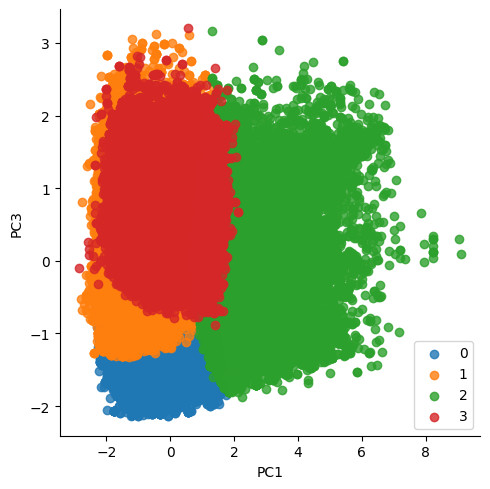

In [40]:

# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="PC1", y="PC3", data=df_pca_predictions, fit_reg=False, hue='ArtistCluster', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

plt.show()

In [ ]:
# Scale the data
#data = (data - data.min()) / (data.max() - data.min()) * 9 +1
#data.describe()

,popularity,danceability,energy,loudness,tempo
count,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000
mean,3.999199,6.180997,6.778818,7.873247,5.518111
std,2.005547,1.584449,2.259480,0.834264,1.108413
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.530000,5.166497,5.257000,7.581155,4.672008
50%,4.150000,6.299492,7.165000,8.080739,5.512351
75%,5.500000,7.350254,8.686000,8.413018,6.179996
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [ ]:
#data.head()

,popularity,danceability,energy,loudness,tempo
0,7.57,7.176650,5.1490,8.122524,4.251208
1,5.95,4.837563,2.4940,6.376394,3.865576
2,6.13,5.002030,4.2310,7.625104,3.822790
3,7.39,3.430457,1.5364,6.163309,7.720822
4,8.38,6.646701,4.9870,7.633927,5.435765


In [ ]:
# Initialize random centroids
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [ ]:
centroids = random_centroids(data, 4)
centroids

,0,1,2,3
popularity,4.510000,3.520000,3.430000,3.070000
danceability,5.321827,7.130964,6.573604,5.833503
energy,7.129000,5.518000,9.496000,7.912000
loudness,8.375895,8.465623,8.254869,7.529382
tempo,3.359166,5.584796,6.913355,4.767011


In [ ]:
# Label each data point
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)   
labels = get_labels(data, centroids)
labels.value_counts()

1    45616
2    27801
3    22658
0    17474
dtype: int64

In [ ]:
# update centroids

In [ ]:
def new_centroids(data, labels, k):
    data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [ ]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [ ]:
def plot_clusters(data, labels, centroids, interations):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids[:,1])
    plt.show()
plot_clusters

<function __main__.plot_clusters(data, labels, centroids, interations)>

InvalidIndexError: (slice(None, None, None), 1)

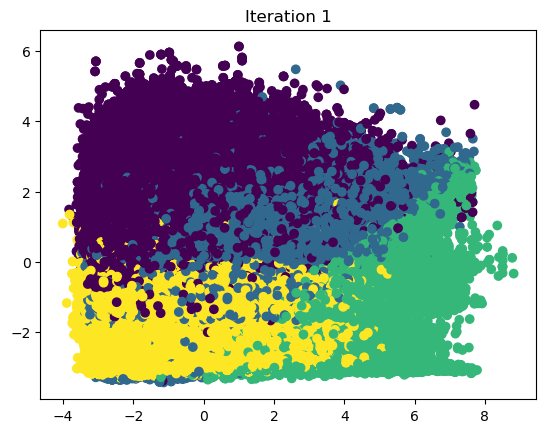

In [ ]:
max_iterations = 100
k = 4

centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, k)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(4)
kmeans.fit(data)


In [ ]:
centroids = kmeans.cluster_centers_

In [ ]:
pd.DataFrame(centroids, columns = features).T